In [1]:
#BOOK RECOMMENDATION SYSTEM WITH EDA

In [2]:
import pandas as pd

books = pd.read_csv('Data/BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1')
users = pd.read_csv('Data/BX-Users.csv', sep=";", on_bad_lines='skip', encoding='latin-1')
ratings = pd.read_csv('Data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1')

C:\Users\saisi\AppData\Local\Temp\ipykernel_40488\4217095967.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Data/BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1')


In [3]:
print("Books Dataset Columns:", books.columns)
print("Users Dataset Columns:", users.columns)
print("Ratings Dataset Columns:", ratings.columns)

Books Dataset Columns: Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Users Dataset Columns: Index(['User-ID', 'Location', 'Age'], dtype='object')
Ratings Dataset Columns: Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [4]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers = find_outliers(ratings, 'Book-Rating')
print("\nOutliers in Ratings Dataset:")
print(outliers)


Outliers in Ratings Dataset:
Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: []


In [5]:
print("Dataset Shape (Rows, Columns):", ratings.shape)
print("\nData Types of Each Column:")
print(ratings.dtypes)

Dataset Shape (Rows, Columns): (1149780, 3)

Data Types of Each Column:
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [6]:
print("Dataset Shape (Rows, Columns):", users.shape)
print("\nData Types of Each Column:")
print(users.dtypes)

Dataset Shape (Rows, Columns): (278858, 3)

Data Types of Each Column:
User-ID       int64
Location     object
Age         float64
dtype: object


In [7]:
print("Dataset Shape (Rows, Columns):", books.shape)
print("\nData Types of Each Column:")
print(books.dtypes)

Dataset Shape (Rows, Columns): (271360, 8)

Data Types of Each Column:
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [8]:
missing_values = ratings.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [9]:
missing_values = users.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
User-ID          0
Location         0
Age         110762
dtype: int64


In [10]:
missing_values = books.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [11]:
summary_stats = ratings.describe()
print("\nSummary Statistics (Mean, Median, Mode, Std Deviation):")
print(summary_stats)


Summary Statistics (Mean, Median, Mode, Std Deviation):
            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


In [12]:
summary_stats = users.describe()
print("\nSummary Statistics (Mean, Median, Mode, Std Deviation):")
print(summary_stats)


Summary Statistics (Mean, Median, Mode, Std Deviation):
            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000


In [13]:
summary_stats = books.describe()
print("\nSummary Statistics (Mean, Median, Mode, Std Deviation):")
print(summary_stats)


Summary Statistics (Mean, Median, Mode, Std Deviation):
              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://ima

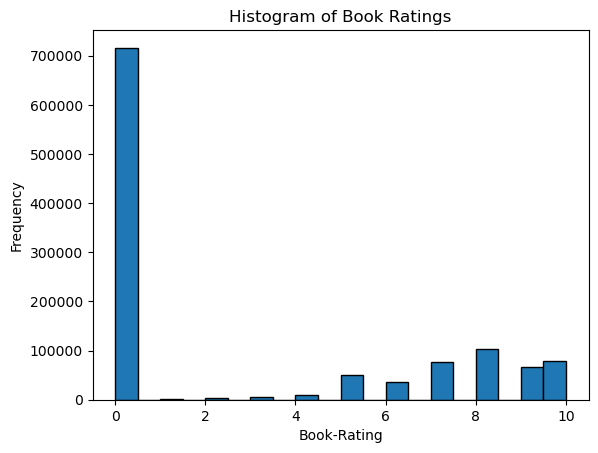

In [14]:
import matplotlib.pyplot as plt

plt.hist(ratings['Book-Rating'], bins=20, edgecolor='black')
plt.title("Histogram of Book Ratings")
plt.xlabel("Book-Rating")
plt.ylabel("Frequency")
plt.show()

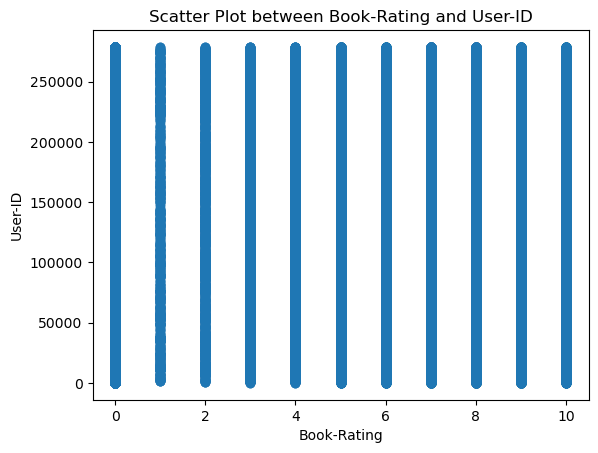

In [15]:
plt.scatter(ratings['Book-Rating'], ratings['User-ID'], alpha=0.5)
plt.title("Scatter Plot between Book-Rating and User-ID")
plt.xlabel("Book-Rating")
plt.ylabel("User-ID")
plt.show()

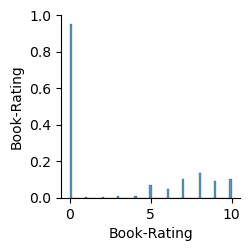

In [16]:
import seaborn as sns
sns.pairplot(ratings[['Book-Rating']])
plt.show()

In [17]:
ratings_cleaned_drop = ratings.dropna()
print("\nDataset after dropping rows with missing values:")
print(ratings_cleaned_drop.shape)


Dataset after dropping rows with missing values:
(1149780, 3)


In [18]:
numeric_columns = ratings.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              User-ID  Book-Rating
User-ID      1.000000    -0.046944
Book-Rating -0.046944     1.000000


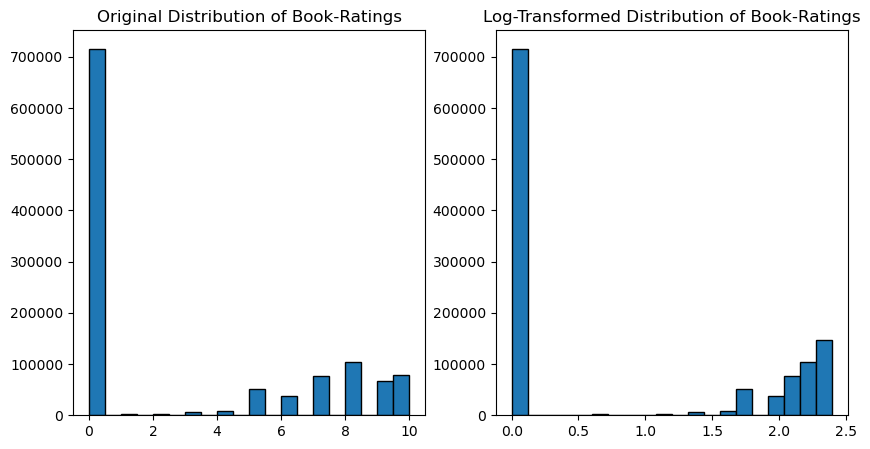

In [19]:
import numpy as np

ratings['Book-Rating-Log'] = np.log1p(ratings['Book-Rating'])
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(ratings['Book-Rating'], bins=20, edgecolor='black')
plt.title("Original Distribution of Book-Ratings")

plt.subplot(1, 2, 2)
plt.hist(ratings['Book-Rating-Log'], bins=20, edgecolor='black')
plt.title("Log-Transformed Distribution of Book-Ratings")

plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ratings['Book-Rating-Standardized'] = scaler.fit_transform(ratings[['Book-Rating']])
print(ratings[['Book-Rating', 'Book-Rating-Standardized']].head())

   Book-Rating  Book-Rating-Standardized
0            0                 -0.743854
1            5                  0.553438
2            0                 -0.743854
3            3                  0.034521
4            6                  0.812896


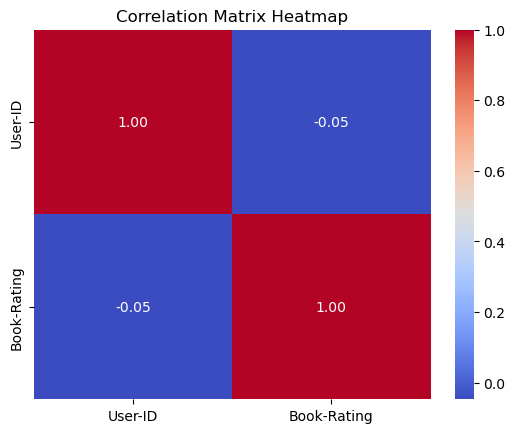

In [21]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()